In [32]:
import pandas as pd

In [56]:
data = pd.read_csv("./data_firmen.csv", sep=";")
data.head()

,Offizieller_Name,streetAddress,postalCode,addressLocality,Telefon,Email,Fax,Internet,Handelsregister,Rechtsform,Hauptsitz,Firmengründung,Inhaber,Geschäftsführung,Branche,Unternehmensgegendstand,Umsatzsteuer-Id,Mitarbeiter,Stammkapital
0,"Klein, Bertelt, Klein Rechtsanwälte in Partner...",Dillinger Strasse 18,66701,Beckingen,+49 (06835) 92351,info@rakbk.de,+49 (0681) 9235120,www.rakbk.de,"PR 81, Amtsgericht Saarbrücken",NaN,Beckingen,2007.0,NaN,NaN,Rechtsanwälte und Anwaltskanzleien,Gegenstand des Unternehmens ist die gemeinscha...,NaN,NaN,NaN
1,Puhl GmbH,Südstrasse 6,66701,Beckingen,+49 (06835) 9220 0,info@spedition-puhl.de,+49 (06835) 922020,www.puhl.eu,"HRB 63518, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,Beckingen,NaN,NaN,"Manfred Puhl, Stefan Puhl",Speditionen / Bauunternehmen,NaN,DE137970178,40 in Deutschland,NaN
2,Cass - Tech - GmbH,Kapellenstrasse 51,66701,Beckingen,+49 (06832) 8080530,info@cass-tech.de,+49 (06832) 8080529,www.cass-tech.de,"HRB 19163, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,Beckingen,2011.0,NaN,NaN,Stahlbau und Leichtmetallbau,Metallbau und Konstruktion.,NaN,NaN,25.000 Euro
3,Malermeister + Stuckateurbetrieb Arno Schorn GmbH,Auf Schlädt 24,66701,Beckingen,+49 (06832) 1314,info@malermeisterschorn.de,+49 (06832) 128300,www.malermeisterschorn.de,"HRB 18614, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,Beckingen,2010.0,NaN,NaN,Maler und Lackierer,Gegenstand des Unternehmens ist der Betrieb ei...,NaN,NaN,25.000 Euro
4,FST Logistik GmbH,Auf der Heide 46 b,66701,Beckingen,+49 (06832) 8080460,luttermann@fst-gmbh.de,+49 (06832) 80563,www.fst-gmbh.de,"HRB 18570, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,Beckingen,2010.0,NaN,NaN,Logistik,Gegenstand des Unternehmens ist die Durchführu...,NaN,NaN,25.000 Euro


In [60]:
print(data.shape)
print(data.dtypes)
data.describe() # does not make a whole lot of sense, change some of the types

(4805, 19)
Offizieller_Name            object
streetAddress               object
postalCode                   int64
addressLocality             object
Telefon                     object
Email                       object
Fax                         object
Internet                    object
Handelsregister             object
Rechtsform                  object
Hauptsitz                   object
Firmengründung             float64
Inhaber                     object
Geschäftsführung            object
Branche                     object
Unternehmensgegendstand     object
Umsatzsteuer-Id             object
Mitarbeiter                 object
Stammkapital                object
dtype: object


,postalCode,Firmengründung
count,4805.000000,1006.000000
mean,66544.241207,2004.439364
std,159.671672,23.109340
min,66222.000000,1685.000000
25%,66424.000000,2010.000000
50%,66539.000000,2011.000000
75%,66663.000000,2012.000000
max,68822.000000,2013.000000


In [58]:
data = data.drop(data[data['Branche'].isnull()].index)
print(data.shape)
data['Rechtsform'].unique()

(5183, 19)


array([nan, 'GmbH: Gesellschaft mit beschränkter Haftung',
       'UG (haftungsbeschränkt): Unternehmergesellschaft (haftungsbeschränkt)',
       'GmbH + Co. KG: Gesellschaft mit beschränkter Haftung und Compagnie Kommanditgesellschaft',
       'e.K.: Eingetragener Kaufmann/Eingetragene Kauffrau (auch e.Kfm. oder e.Kffr.)',
       'OHG: Offene Handelsgesellschaft', 'AG: Aktiengesellschaft',
       'e.V.: Eingetragener Verein', 'KG: Kommanditgesellschaft',
       ' e.K.: Eingetragener Kaufmann/Eingetragene Kauffrau (auch e.Kfm. oder e.Kffr.)',
       ' GmbH: Gesellschaft mit beschränkter Haftung', 'Ltd.: Limited',
       'Ltd. + Co. KG: Limited und Compagnie Kommanditgesellschaft',
       'gGmbH: Gemeinnützige Gesellschaft mit beschränkter Haftung',
       'SE: Europäische Gesellschaft (Societas Europaea)',
       'UG (haftungsbeschränkt) + Co. KG: Unternehmergesellschaft (haftungsbeschränkt) und Compagnie Kommanditgesellschaft',
       'AG + Co. KG: Aktiengesellschaft und Compagnie Kom

In [59]:
data = data[data['Rechtsform'] != ' e.K.: Eingetragener Kaufmann/Eingetragene Kauffrau (auch e.Kfm. oder e.Kffr.)']
data = data[data['Rechtsform'] != 'e.K.: Eingetragener Kaufmann/Eingetragene Kauffrau (auch e.Kfm. oder e.Kffr.)']
data = data[data['Rechtsform'] != 'e.V.: Eingetragener Verein']

In [36]:
data['Rechtsform'].unique()

array([nan, 'GmbH: Gesellschaft mit beschränkter Haftung',
       'UG (haftungsbeschränkt): Unternehmergesellschaft (haftungsbeschränkt)',
       'GmbH + Co. KG: Gesellschaft mit beschränkter Haftung und Compagnie Kommanditgesellschaft',
       'OHG: Offene Handelsgesellschaft', 'AG: Aktiengesellschaft',
       'KG: Kommanditgesellschaft',
       ' GmbH: Gesellschaft mit beschränkter Haftung', 'Ltd.: Limited',
       'Ltd. + Co. KG: Limited und Compagnie Kommanditgesellschaft',
       'gGmbH: Gemeinnützige Gesellschaft mit beschränkter Haftung',
       'SE: Europäische Gesellschaft (Societas Europaea)',
       'UG (haftungsbeschränkt) + Co. KG: Unternehmergesellschaft (haftungsbeschränkt) und Compagnie Kommanditgesellschaft',
       'AG + Co. KG: Aktiengesellschaft und Compagnie Kommanditgesellschaft',
       'eG: Eingetragene Genossenschaft (auch e.G.)',
       'GmbH + Co. KGaA: Gesellschaft mit beschränkter Haftung und Compagnie Kommanditgesellschaft auf Aktien',
       'AdöR: Anstal

In [37]:
print(data.shape)

(4805, 19)


In [38]:
data = data.dropna(subset = ['Rechtsform'], axis =0)

In [40]:
data.head()

,Offizieller_Name,streetAddress,postalCode,addressLocality,Telefon,Email,Fax,Internet,Handelsregister,Rechtsform,Hauptsitz,Firmengründung,Inhaber,Geschäftsführung,Branche,Unternehmensgegendstand,Umsatzsteuer-Id,Mitarbeiter,Stammkapital
1,Puhl GmbH,Südstrasse 6,66701,Beckingen,+49 (06835) 9220 0,info@spedition-puhl.de,+49 (06835) 922020,www.puhl.eu,"HRB 63518, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,Beckingen,NaN,NaN,"Manfred Puhl, Stefan Puhl",Speditionen / Bauunternehmen,NaN,DE137970178,40 in Deutschland,NaN
2,Cass - Tech - GmbH,Kapellenstrasse 51,66701,Beckingen,+49 (06832) 8080530,info@cass-tech.de,+49 (06832) 8080529,www.cass-tech.de,"HRB 19163, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,Beckingen,2011.0,NaN,NaN,Stahlbau und Leichtmetallbau,NaN,NaN,NaN,25.000 Euro
3,Malermeister + Stuckateurbetrieb Arno Schorn GmbH,Auf Schlädt 24,66701,Beckingen,+49 (06832) 1314,info@malermeisterschorn.de,+49 (06832) 128300,www.malermeisterschorn.de,"HRB 18614, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,Beckingen,2010.0,NaN,NaN,Maler und Lackierer,NaN,NaN,NaN,25.000 Euro
4,FST Logistik GmbH,Auf der Heide 46 b,66701,Beckingen,+49 (06832) 8080460,luttermann@fst-gmbh.de,+49 (06832) 80563,www.fst-gmbh.de,"HRB 18570, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,Beckingen,2010.0,NaN,NaN,Logistik,NaN,NaN,NaN,25.000 Euro
5,reaktiv 2010 UG (haftungsbeschränkt),Ahornweg 15,66701,Beckingen,+49 (06835) 6070181,info@reaktiv2010.de,+49 (06835) 6070180,www.reaktiv2010.de,"HRB 19016, Amtsgericht Saarbrücken",UG (haftungsbeschränkt): Unternehmergesellscha...,Beckingen,2010.0,NaN,NaN,Dienstleistungen a.n.g.,NaN,NaN,NaN,NaN


In [41]:
data['Branche'].nunique()

698

In [42]:
patternDel = "Einzelhandel"
filter = data['Branche'].str.contains(patternDel)
data = data[~filter]
print(data.shape)


(4269, 19)


In [43]:
list = data['Offizieller_Name'].unique()
for x in list:
    print(x)

Puhl GmbH
Cass - Tech - GmbH
Malermeister + Stuckateurbetrieb Arno Schorn GmbH
FST Logistik GmbH
reaktiv 2010 UG (haftungsbeschränkt)
Autoteile Glauben GmbH
MHT Federspiel Heizung + Sanitär GmbH
Martin Söther GmbH
Achten GmbH
B. Manstein GmbH
Brigitta + Josef Schwinn Geschäftsführungs GmbH
FuGo FussballGolf GmbH
Günther Kaiser GmbH + Co. KG
Holztechnik HAUPERT UG (haftungsbeschränkt)
Müllenbach Reisen GmbH
Schommer GmbH
F + Z Bau GmbH
PTZ Südwest UG (haftungsbeschränkt)
Truck + Trailer 24 GmbH
D. Ziemer GmbH + Co. KG
IEG Industriereinigungs- und Entsorgungsdienstleistungen GmbH
t.trading SAAR GmbH - Tiles + More
AB-RE-Trans GmbH + Co. KG
C.P.S. - Pharma GmbH
Hackenberger GmbH
Johannes GmbH
MiBau Boden- + Fugensanierungs GmbH
PHARMEC GmbH
Pharmahandel Köhnen GmbH
WRD Grosse-Beck GmbH
Zenner Hochbau GmbH
ZWP Anlagenrevision GmbH
A + K Modern Style GmbH
Bacus + Bergauer GmbH
Bella Stuck Geschäftsführungsgesellschaft mbH
Brigitta und Josef Schwinn GmbH + Co. KG
MPB Geschäftsführungsgesells

In [18]:
pattern_preserve= GmbH, mbH, AG, Co. KG,  oHG, Ltd., OHG

SyntaxError: invalid syntax (2909803229.py, line 1)

Attempting some analysis and clustering

In [44]:
data.columns

Index(['Offizieller_Name', 'streetAddress', 'postalCode', 'addressLocality',
       'Telefon', 'Email', 'Fax', 'Internet', 'Handelsregister', 'Rechtsform',
       'Hauptsitz', 'Firmengründung', 'Inhaber', 'Geschäftsführung', 'Branche',
       'Unternehmensgegendstand', 'Umsatzsteuer-Id', 'Mitarbeiter',
       'Stammkapital'],
      dtype='object')

In [47]:
data.dtypes

Offizieller_Name            object
streetAddress               object
postalCode                   int64
addressLocality             object
Telefon                     object
Email                       object
Fax                         object
Internet                    object
Handelsregister             object
Rechtsform                  object
Hauptsitz                   object
Firmengründung             float64
Inhaber                     object
Geschäftsführung            object
Branche                     object
Unternehmensgegendstand    float64
Umsatzsteuer-Id             object
Mitarbeiter                 object
Stammkapital                object
dtype: object

In [49]:
data.describe() # does not make a whole lot of sense, change some of the types

,postalCode,Firmengründung,Unternehmensgegendstand
count,4269.000000,940.000000,0.0
mean,66546.339892,2004.762766,NaN
std,161.113647,20.954489,NaN
min,66222.000000,1748.000000,NaN
25%,66424.000000,2010.000000,NaN
50%,66539.000000,2011.000000,NaN
75%,66663.000000,2012.000000,NaN
max,68822.000000,2013.000000,NaN


In [50]:
data["Branche"].value_counts()

Verwaltung und Management von Unternehmen und Betrieben                                               281
Dienstleistungen a.n.g.                                                                               215
Holding- und Beteiligungsgesellschaften                                                               199
Unternehmensberatung, Unternehmensberater                                                             110
Autohandel und Kfz-Handel (Nutzfahrzeuge, LKW etc.)                                                    80
                                                                                                     ... 
Herstellung von Musikinstrumenten                                                                       1
Grosshandel mit Büromöbeln und Büromaschinen                                                            1
Herstellung von Maschinen für die Lebensmittelindustrie und die Tabakindustrie                          1
Herbergen, Campingplätze und andere Unterkünft

Text(0, 0.5, 'Count')

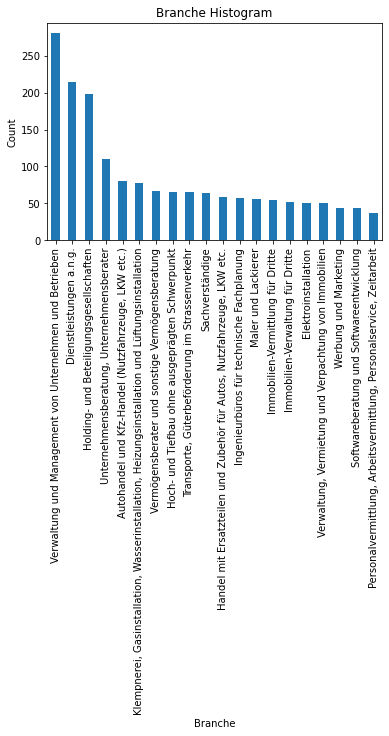

In [51]:
ax = data["Branche"].value_counts().head(20).plot(kind='bar', title="Branche Histogram")
ax.set_xlabel("Branche")
ax.set_ylabel('Count')

In [52]:
data["postalCode"].values

array([66701, 66701, 66701, ..., 66625, 66625, 66625], dtype=int64)

In [53]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
x = data["postalCode"].values
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

ValueError: Length n of condensed distance matrix 'y' must be a binomial coefficient, i.e.there must be a k such that (k \choose 2)=n)!